In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt

#Read Datasets

In [2]:
ham_data = pd.read_csv('0002.1999-12-13.farmer.ham.txt', sep = '\t')
spam_data = pd.read_csv ('0084.2003-12-27.GP.spam.txt', sep = '\t')

ham_data = ham_data.rename(columns={ham_data.columns[0]: 'message'})
spam_data = spam_data.rename(columns={spam_data.columns[0]: 'message'})

ham_data ['label'] = 'ham'
spam_data ['label'] = 'spam'

In [3]:
frame = [ham_data, spam_data]
data = pd.concat(frame)

data[['label']] = data[['label']].apply(lambda col:pd.Categorical(col).codes)
data

,message,label
0,"gary , production from the high island larger ...",0
1,"saturday at 2 : 00 p . m . at about 6 , 500 gr...",0
2,"10 , 000 gross for tomorrow . vastar owns 68 %...",0
3,george x 3 - 6992,0
4,- - - - - - - - - - - - - - - - - - - - - - fo...,0
...,...,...
137,extra charges include a $ 5 per minute service...,1
138,your phone bill . / font / p,1
139,pnbsp ; / p,1
140,/ body,1


In [4]:
x = data['message']
y = data['label']

In [5]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2)

#Stemming and Lemmatization

In [6]:
cv = CountVectorizer()
cv.fit(x_train)

x_train = cv.transform(x_train)
x_test = cv.transform(x_test)

#Training

In [7]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#Testing

In [8]:
predicted = nb.predict(x_test)
confusion_matrix(y_test, predicted)

array([[ 8, 13],
       [ 0, 30]])

In [9]:
print(nb.score(x_test, y_test))

0.7450980392156863


#Model Evaluation

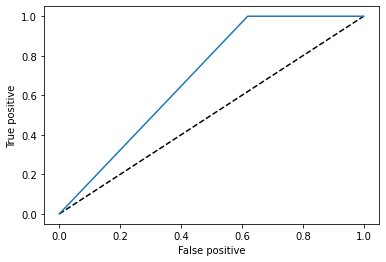

In [10]:
fpr,tpr,thresholds = roc_curve(y_test , predicted)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.show()